In [58]:
#importing google drvie into google collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
%cd /content/drive/MyDrive/Assignment1_AI

/content/drive/MyDrive/Assignment1_AI


In [60]:
!ls

Middle_East_Happiness.csv  south_asian_countries_data.csv  WHR-2024-5CS037.csv
South_Asia_Happiness.csv   Sushanta_Marahatta_A1.ipynb


In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## **3.1 Problem -1 Getting Started with Data Exploration**
### **Data Exploration and Understanding**
### **- Dataset Overview**

**1. Load Dataset and Display First 10 Rows**

In [63]:

# Load the dataset
df = pd.read_csv('WHR-2024-5CS037.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


In [64]:
#displaying the first 10 rows
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


### **2. Identify the numbers of rows and columns in the Dataset.**

In [65]:
#getting  the number of rows and columns
num_rows, num_columns = df.shape
print(f"The number of rows in this dataset: {num_rows}.\nThe number of columns in this dataset: {num_columns}.")

The number of rows in this dataset: 143.
The number of columns in this dataset: 9.


### **3. List of all the columns and datatypes.**

In [66]:
#printing all the columns and their datatypes
print("\nColumns and their data types:")
print(df.dtypes)


Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


**Basic Statistics:**
1. Calculate the mean, median, and standard deviation for the Score Column.

In [67]:
#Calculate the mean, median, and standard deviation for the Score column.
mean_score = df['score'].mean()
median_score = df['score'].median()
standard_deviation_score = df['score'].std()

print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Standard Deviation: {standard_deviation_score}")


Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995


**2. Identify the country with the highest and lowest happiness scores.**

In [68]:
#identifying the country with highest and lowest happiness scores
mean_score = df['score'].mean()
#loc[]: Fetches the row corresponding to the index.
#idxmax() and idxmin(): These return the index of the row with the maximum and minimum value in the Score column.

highest_score_country=df.loc[df['score'].idxmax(),'Country name']
lowest_score_country=df.loc[df['score'].idxmin(),'Country name']

print(f"Country with the highest happiness score : {highest_score_country}")
print(f"Country with the lowest happiness score : {lowest_score_country}")

Country with the highest happiness score : Finland
Country with the lowest happiness score : Afghanistan


**Missing Values:**
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [69]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


### **Filtering and Sorting:**
1. Filter the dataset to show only the countries with a Score greater than 7.5

In [115]:
# Filter and sort the dataset for countries with a Score greater than 7.5
filtered_df = df[df['score'] > 7.5].shape[0]
filtered_df

3

**2. For the filtered dataset, Sort the database by GDP per Capita in descending order.**

In [71]:
sorted_df = df.sort_values(by=['Log GDP per capita'], ascending=False)
sorted_df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
85,Hong Kong S.A.R. of China,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906


**Display the top 10 rows.**

In [72]:
# Display the top 10 rows
print("Top 10 countries with Score > 7.5, sorted by GDP per Capita:")
print(sorted_df.head(10))

Top 10 countries with Score > 7.5, sorted by GDP per Capita:
                 Country name  score  Log GDP per capita  Social support  \
7                  Luxembourg  7.122               2.141           1.355   
16                    Ireland  6.838               2.129           1.390   
29                  Singapore  6.523               2.118           1.361   
21       United Arab Emirates  6.733               1.983           1.164   
8                 Switzerland  7.060               1.970           1.425   
6                      Norway  7.302               1.952           1.517   
22              United States  6.725               1.939           1.392   
85  Hong Kong S.A.R. of China  5.316               1.909           1.184   
1                     Denmark  7.583               1.908           1.520   
5                 Netherlands  7.319               1.901           1.462   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
7                     0.708  

**Adding New Columns:**
1. Create a new column called Happiness that categorizes countries im 3 categories based on score of Low, Medium & High (Score < 4, 4<= Score <= 6, Score > 6).

In [73]:
#adding new column to the dataframe
def category_happiness(score):
  if score<4:
    return 'Low'
  elif score <=6:
    return 'Medium'
  else:
    return 'High'

df['Happiness_Category']=df['score'].apply(category_happiness)
df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


In [74]:
print(df.columns)


Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual',
       'Happiness_Category'],
      dtype='object')


**2. Data Visualizations:**
- Bar plot: Plotting the top 10 happiest countries based on Score by using a Bar Chart.

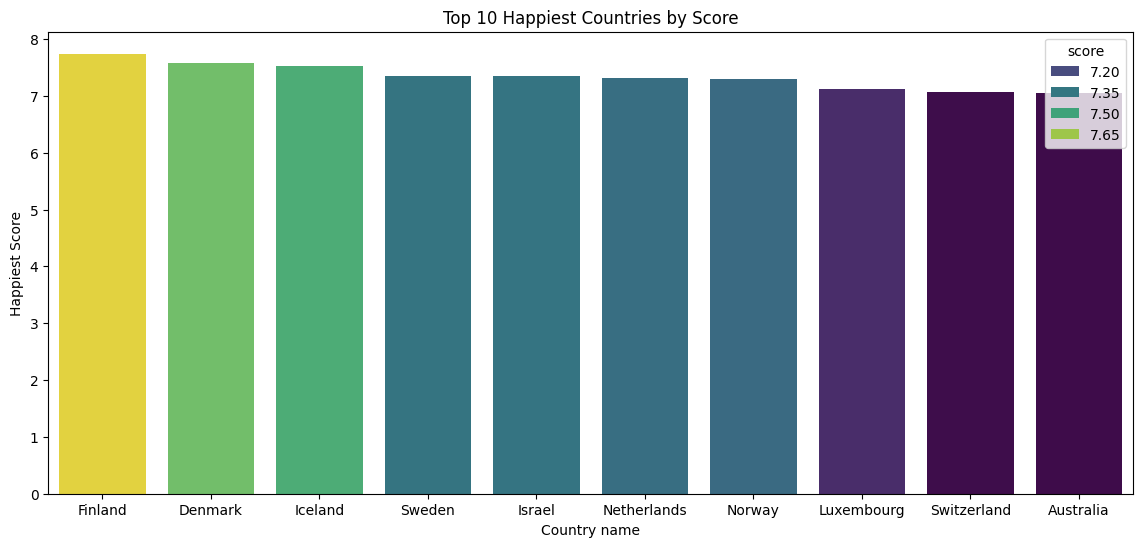

In [75]:
# Top 10 happiest countries (replace 'score' and 'Country name' if necessary)
top_10_happiest = df.nlargest(10, 'score')  # Ensure 'Score' is the correct column name

# Create a bar plot using seaborn
plt.figure(figsize=(14, 6))
sns.barplot(x='Country name', y='score', data=top_10_happiest, palette = 'viridis', hue = 'score')

# Add labels and title
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country name')
plt.ylabel('Happiest Score')

# Display the plot
plt.show()

**- Line Plot: Plotting the top 10 unhappiest countries based on Score by using a Line Chart.**

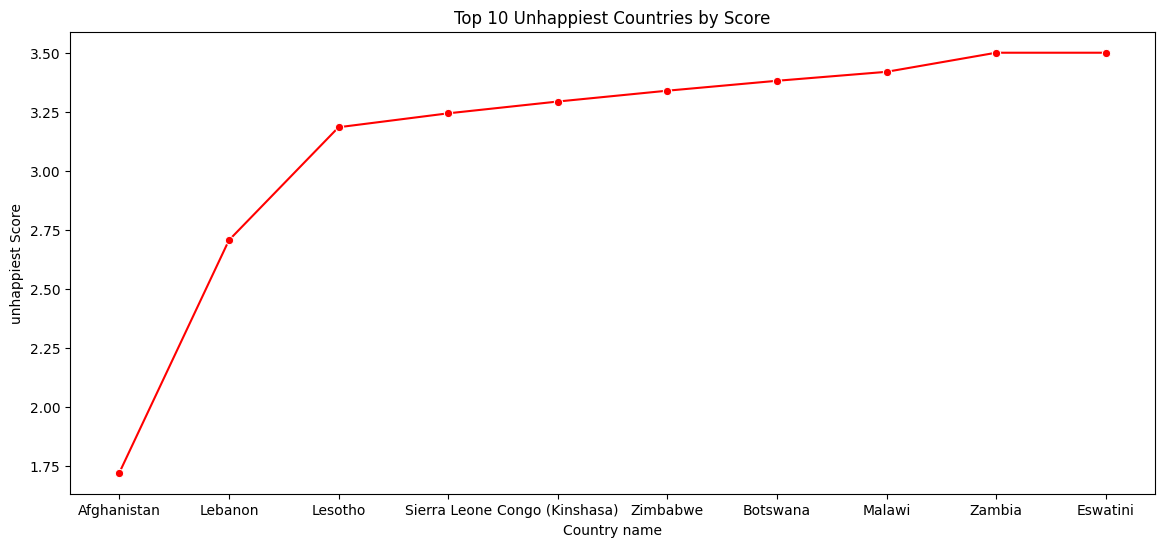

In [76]:
# Top 10 unhappiest countries
top_10_unhappiest = df.nsmallest(10, 'score')

# Line plot
plt.figure(figsize=(14, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country name')
plt.ylabel('unhappiest Score')
plt.show()


**- Plotting a histogram for the Score column to show its distribution and also interpret.**

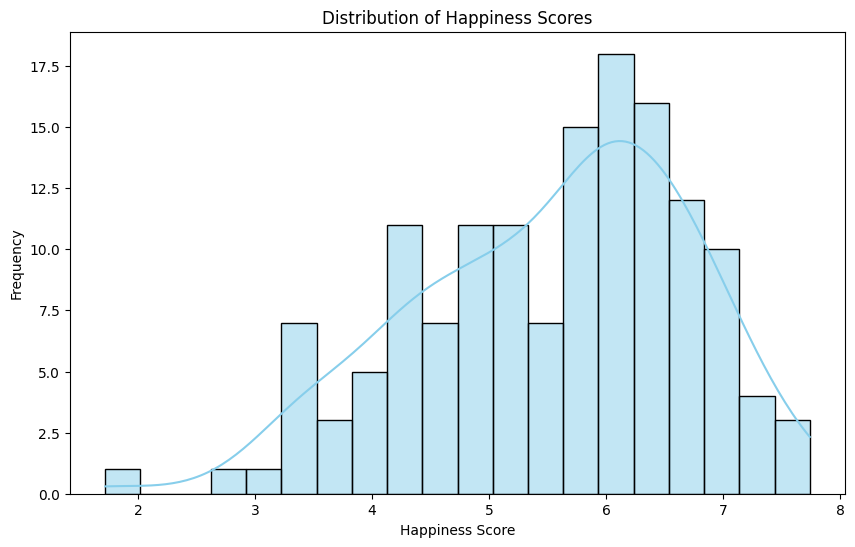

In [121]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

In [78]:
df.columns

Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual',
       'Happiness_Category'],
      dtype='object')

**- Scatter Plot: Plotting a scatter plot between GDP per Capita & Score to visualize their relationship.**

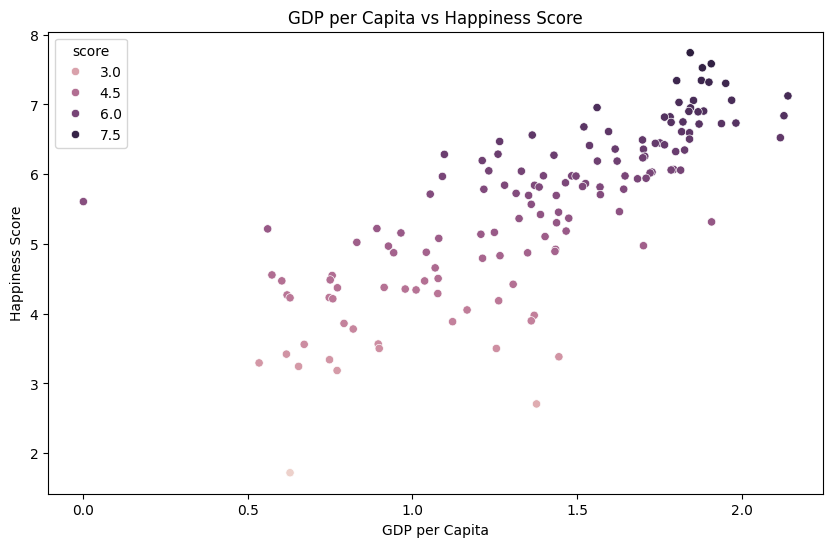

In [79]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color = 'orange', hue= 'score')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


## **3.2 Problem**
**- Advance Data Exploration**
1. Define the countries in South Asia with a list of south asian countries. [ 'Afganstan' , 'Bangladesh' , 'Bhutan' , 'India' , 'Maldives' , 'Nepal' , 'Pakistan' , 'Srilanka' ]
2. Use the list from step 1. to filter the dataset. (filtered out matching dataset from the list)
3. Save the filtered dataframe as separate CSV files for the future.

In [ ]:
#Problem 2

In [80]:
#Defining South Asian Countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

#Filtering the dataset
filtered_dataset = df[df['Country name'].isin(south_asian_countries)]

#Saving the filtered dataframe as new CSV file
filtered_dataset.to_csv('south_asian_countries_data.csv', index=False)
print("Saved as:", filtered_dataset)

Saved as:     Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruptio

## **Task 2:**

**- Composite Score Ranking**
1. Using the South Asian Countries Dataframe, create a new column called Composite Score that combines the following metrics.
(Composite Score = 0.40 * GDP per Capita + 0.30 * Social Support + 0.30 * Healthy Life Expectancy.)
2. Rank the South Asian Countries based on the Composite Score in descending order.

In [81]:
south_asian_countries_df=df[df['Country name'].isin(south_asian_countries)]

south_asian_countries_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [122]:
#Saving the filtered dataset in different CSV
south_asian_countries_df.to_csv('south_asian_countries_data.csv', index=False)

In [83]:
south_asian_countries_df.loc[:, 'Composite Score']= (
    0.40*south_asian_countries_df['Log GDP per capita']+
    0.30*south_asian_countries_df['Social support']+
    0.30*south_asian_countries_df['Healthy life expectancy']
)
print("\nTop 5 South Asian Countries by Composite Score:")
south_asian_countries_df


Top 5 South Asian Countries by Composite Score:


<ipython-input-83-7150f53010e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_countries_df.loc[:, 'Composite Score']= (


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [123]:
ranked_south_asia=south_asian_countries_df.sort_values(by=['Composite Score'],ascending=False)

ranked_south_asia[['Country name', 'Composite Score']]

,Country name,Composite Score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


**3. Visualize the top 5 Countries using a horizontal bar chart showing the Composite Score.**

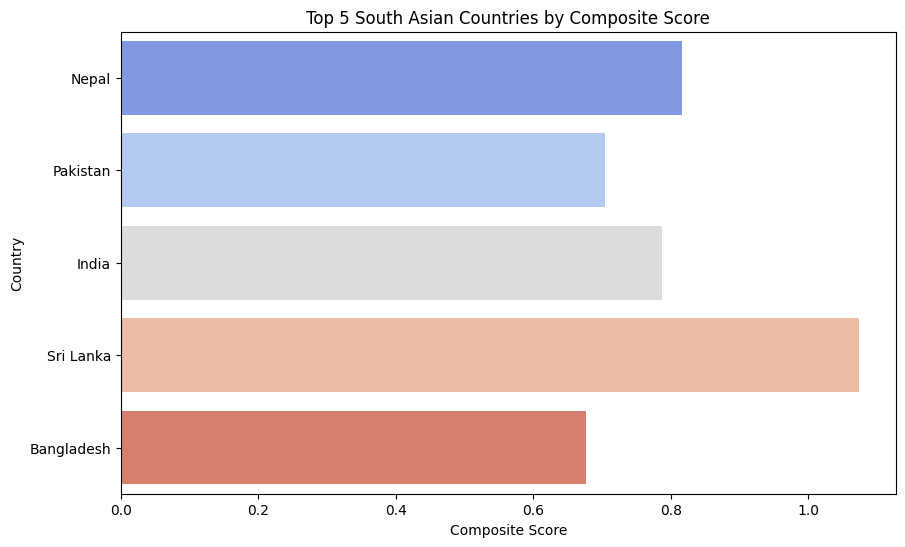

In [84]:
# Horizontal bar chart for top 5 countries by Composite Score
top_5_composite = south_asian_countries_df.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, hue='Country name', palette='coolwarm')
plt.legend([], [], frameon=False)
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()

**4. Discuss whether the rankings based on the Composite Score allign with the Original Score. (Support your discussion with some visualization plot)**

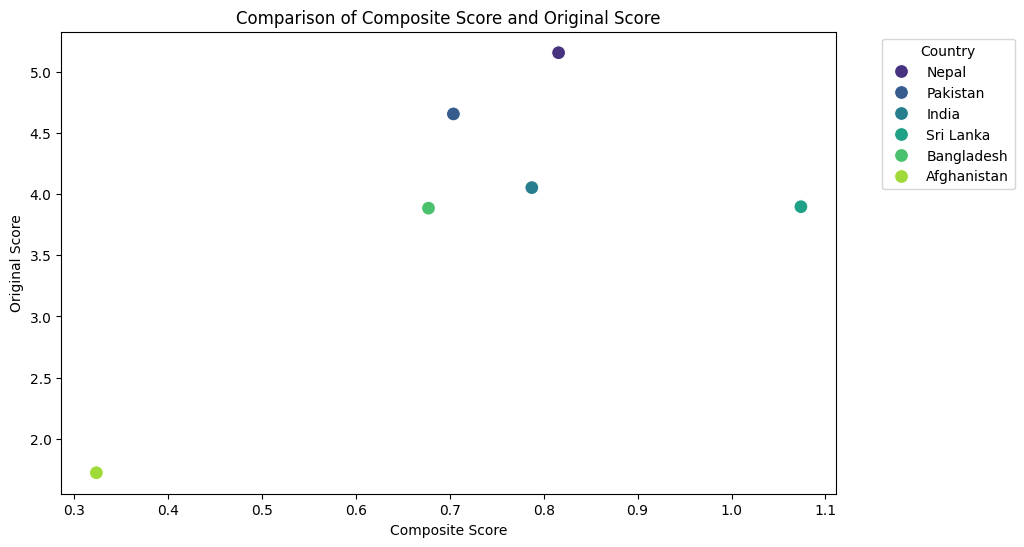

In [85]:
# Compare rankings based on Composite Score and original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Composite Score', y='score', data=south_asian_countries_df,
    hue='Country name', palette='viridis', s=100
)
plt.title("Comparison of Composite Score and Original Score")
plt.xlabel("Composite Score")
plt.ylabel("Original Score")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### **Task 3:**
**- Outlier Detection Task:**
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 * IQR rule.

In [86]:
### Task 3: Outlier Detection
# Define outliers using the 1.5 * IQR rule
Q1 = south_asian_countries_df['Log GDP per capita'].quantile(0.25)
Q3 = south_asian_countries_df['Log GDP per capita'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier countries
outliers = south_asian_countries_df[
    (south_asian_countries_df['Log GDP per capita'] < lower_bound) |
    (south_asian_countries_df['Log GDP per capita'] > upper_bound)
]
print("\nOutlier countries based on GDP per Capita:")
print(outliers[['Country name', 'Log GDP per capita', 'score']])


Outlier countries based on GDP per Capita:
    Country name  Log GDP per capita  score
142  Afghanistan               0.628  1.721


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting Outliers in a different color.

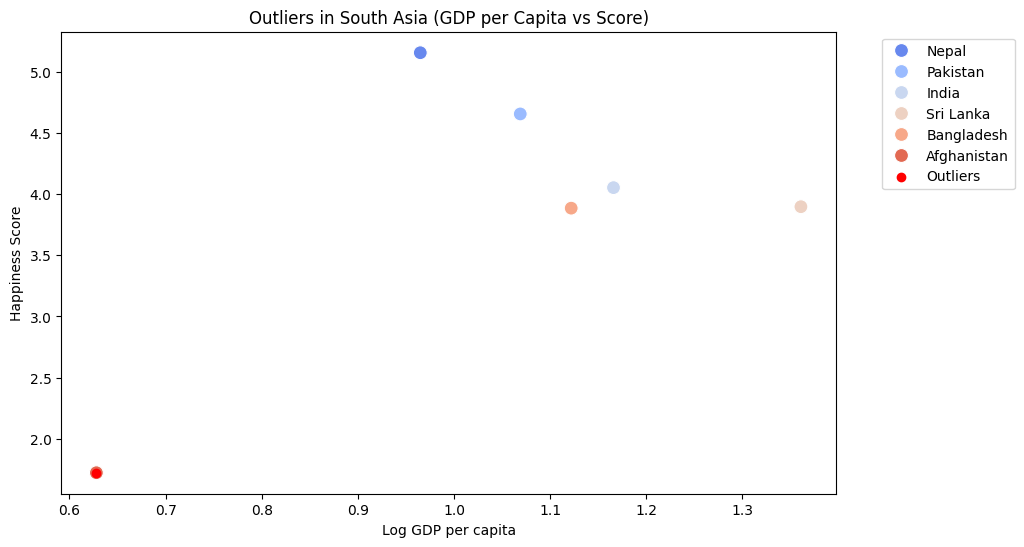

In [91]:
# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita', y='score', data=south_asian_countries_df,
    hue='Country name', palette='coolwarm', s=100
)
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.title("Outliers in South Asia (GDP per Capita vs Score)")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Task 4:**
**- Exploring Trends Across Metrics**
1. Choose two metrics (Freedom to Make Life Choices and Generosity) & calculate their Correlation with the Score for South Asian Countries.

In [92]:
### Task 4: Exploring Trends Across Metrics
# Calculate correlations with Score for two metrics
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {}
for metric in metrics:
    correlations[metric] = south_asian_countries_df[metric].corr(south_asian_countries_df['score'])

print("\nCorrelations with Happiness Score:")
for metric, corr in correlations.items():
    print(f"{metric}: {corr:.2f}")


Correlations with Happiness Score:
Freedom to make life choices: 0.80
Generosity: 0.87


2. Create scatter plots with trendlines for these metrics against the Score.
3. Identity and discuss the strongest and weakest relationships between these metrics and the Score for South Asian Countries.

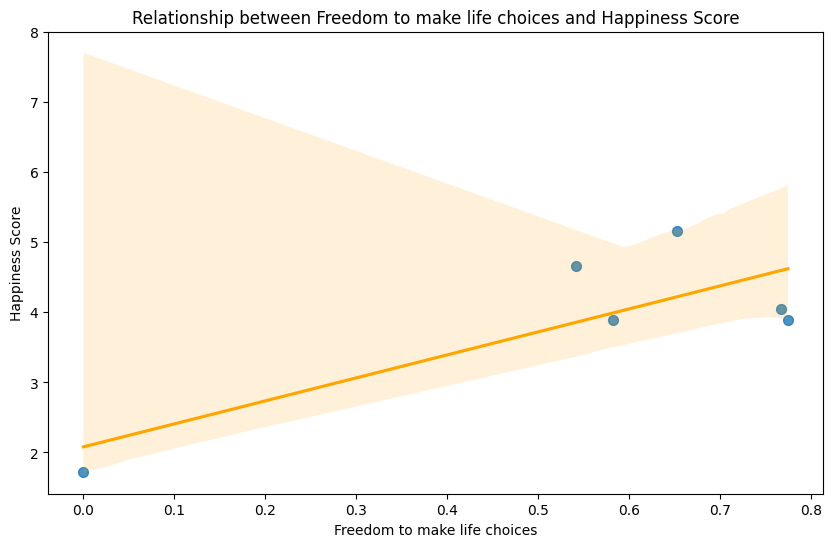

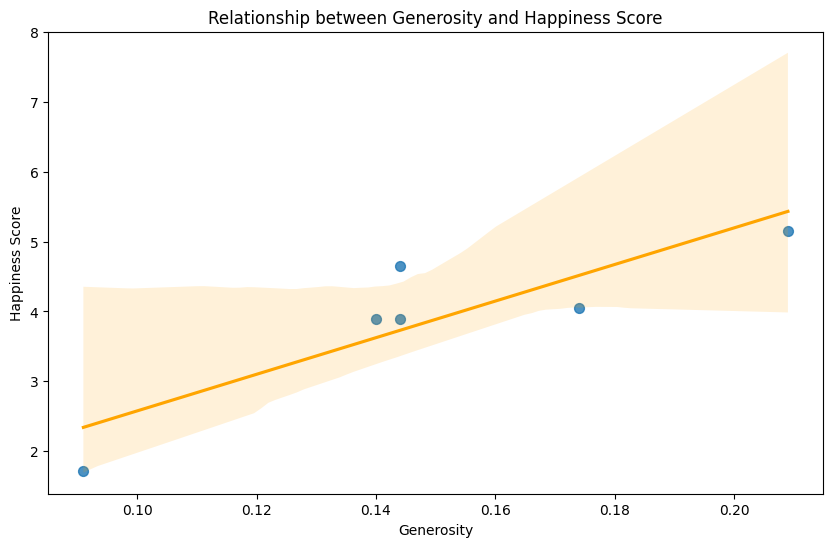

In [97]:
# Scatter plots with trendlines for selected metrics
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=metric, y='score', data=south_asian_countries_df,
        line_kws={"color": "orange"}, scatter_kws={"s": 50}
    )
    plt.title(f"Relationship between {metric} and Happiness Score")
    plt.xlabel(metric)
    plt.ylabel("Happiness Score")
    plt.show()


### **Task 5:**
**- Gap Analysis**
1. Add a new column, GDP-score Gap, which is the difference between GDP per Capita and the Scope for each South Asian Country.
2. Rank the South Asian Countries by this Gap in both ascending and descending order.

In [135]:

south_asian_countries_df['GDP-Score Gap'] = south_asian_countries_df['Log GDP per capita'] - south_asian_countries_df['score']

south_asian_countries_df


<ipython-input-135-6afb52e2d331>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_countries_df['GDP-Score Gap'] = south_asian_countries_df['Log GDP per capita'] - south_asian_countries_df['score']


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [145]:
gap_descending = south_asian_countries_df.sort_values(by=['GDP-Score Gap'])

print("\nSouth Asian Countries with largest positive GDP-Score Gap:")
gap_descending[['Country name', 'GDP-Score Gap']]



South Asian Countries with largest positive GDP-Score Gap:


,Country name,GDP-Score Gap
92,Nepal,-4.193
107,Pakistan,-3.588
125,India,-2.888
128,Bangladesh,-2.764
127,Sri Lanka,-2.537
142,Afghanistan,-1.093


In [148]:
gap_ascending = south_asian_countries_df.sort_values(by=['GDP-Score Gap'], ascending=False)

print("\nSouth Asian countries with largest negative GDP-Score Gap:")
gap_ascending[['Country name', 'GDP-Score Gap']]


South Asian countries with largest negative GDP-Score Gap:


,Country name,GDP-Score Gap
142,Afghanistan,-1.093
127,Sri Lanka,-2.537
128,Bangladesh,-2.764
125,India,-2.888
107,Pakistan,-3.588
92,Nepal,-4.193


In [151]:
gap_descending = gap_descending.head(3)
gap_ascending = gap_ascending.head(3)

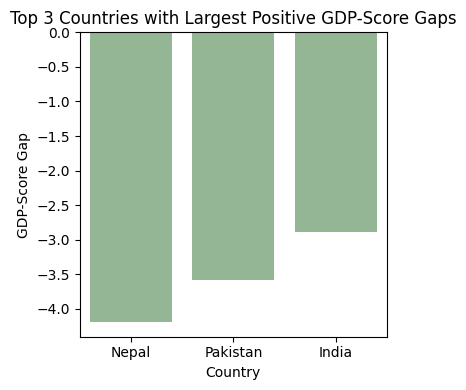

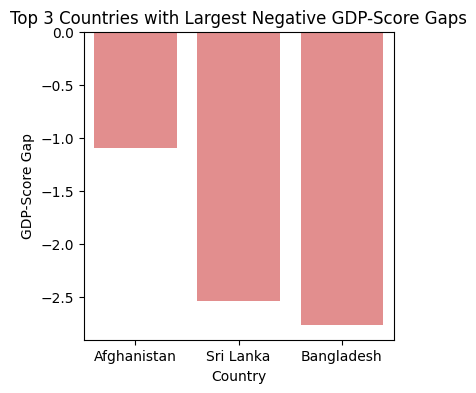

In [152]:
plt.figure(figsize=(4, 4))
sns.barplot(x='Country name', y='GDP-Score Gap', data=gap_descending, color='darkseagreen')
plt.title('Top 3 Countries with Largest Positive GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.tight_layout()
plt.show()

plt.figure(figsize=(4, 4))
sns.barplot(x='Country name', y='GDP-Score Gap', data=gap_ascending, color='lightcoral')
plt.title('Top 3 Countries with Largest Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.show()

3. Highlight the top 3 countries with the largest largest positive and negative gaps using a bar graph.
4. Analyze the reasons behind the gaps and their implications for South Asian Countries.

# **3.3 Problem**
## - Comparitive Analysis
Task 1: Preparing the Middle Eastern Dataset:
1. Similar in Task 1. of problem 2 create a dataframe from Middle Eastern Countries. ["Bahrain" , "Iran" , "Iraq" , "Israel" , "Jordan" , "kuwait" , "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

2. Descriptive Statistics:
- Calculate the Mean, Standard Deviation of the score for both South Asia and Middle East.

In [156]:
# Define South Asia and Middle East country lists

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

middle_east_countries_df = df[df['Country name'].isin(middle_east_countries)]
middle_east_countries_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [158]:
south_asia_mean_score = south_asian_countries_df['score'].mean()
south_asia_std_score = south_asian_countries_df['score'].std()

# Calculate mean and standard deviation for Middle East
middle_east_mean_score = middle_east_countries_df['score'].mean()
middle_east_std_score = middle_east_countries_df['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean_score}, Standard Deviation: {south_asia_std_score}")
print(f"Middle East - Mean Score: {middle_east_mean_score}, Standard Deviation: {middle_east_std_score}")

South Asia - Mean Score: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East - Mean Score: 5.412100000000001, Standard Deviation: 1.5662011684327144


- Finding out which region has Higher Happiness Score on average?

In [159]:
if south_asia_mean_score>middle_east_mean_score:
 print("South Asia has higher happiness scores on average.")
elif middle_east_mean_score>south_asia_mean_score:
 print("Middle East has higher happiness scores on average.")
else:
 print("Both regions have the same average happiness score.")

Middle East has higher happiness scores on average.


In [162]:
## Task 2: Top and Bottom Performers
# Identify top 3 and bottom 3 countries in each region
top_3_southasia = south_asian_countries_df.nlargest(3, 'score')
bottom_3_southasia = south_asian_countries_df.nsmallest(3, 'score')

top_3_middleeast = middle_east_countries_df.nlargest(3, 'score')
bottom_3_middleeast = middle_east_countries_df.nsmallest(3, 'score')

print("\nTop 3 South Asian Countries by Happiness Score:")
print(top_3_southasia[['Country name', 'score']])

print("\nBottom 3 South Asian Countries by Happiness Score:")
print(bottom_3_southasia[['Country name', 'score']])

print("\nTop 3 Middle Eastern Countries by Happiness Score:")
print(top_3_middleeast[['Country name', 'score']])

print("\nBottom 3 Middle Eastern Countries by Happiness Score:")
print(bottom_3_middleeast[['Country name', 'score']])


Top 3 South Asian Countries by Happiness Score:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 South Asian Countries by Happiness Score:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Top 3 Middle Eastern Countries by Happiness Score:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Middle Eastern Countries by Happiness Score:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


2. Top & Bottom Performing Countries:
- Identify the top 3 and bottom 3 Countries in each region based on their score.
- Plot bar charts comparing these charts.

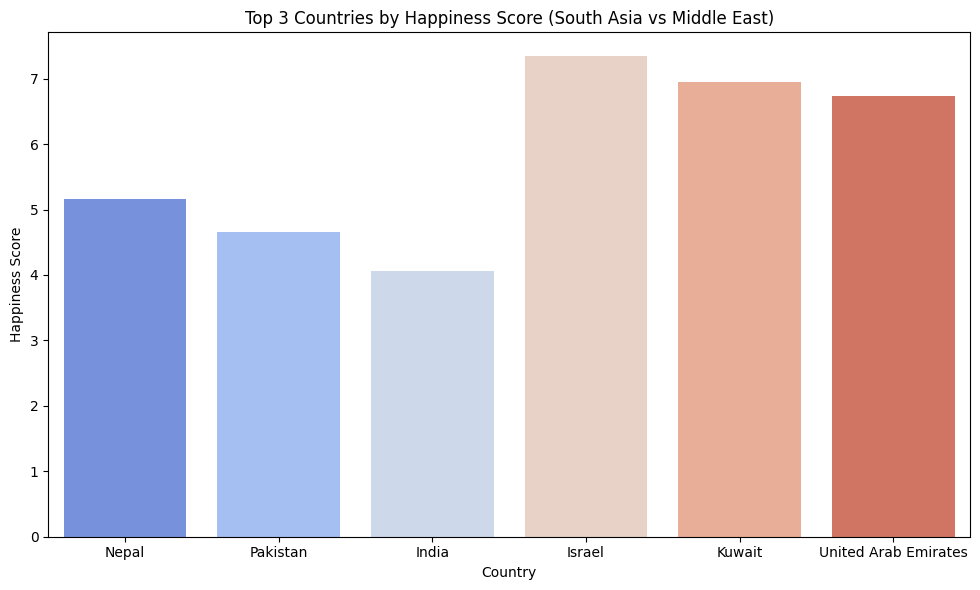

In [169]:
# Bar charts for comparison
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Country name', y='score', data=pd.concat([top_3_southasia, top_3_middleeast]),
    hue='Country name', palette='coolwarm', dodge=False
)
plt.title("Top 3 Countries by Happiness Score (South Asia vs Middle East)")
plt.ylabel("Happiness Score")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

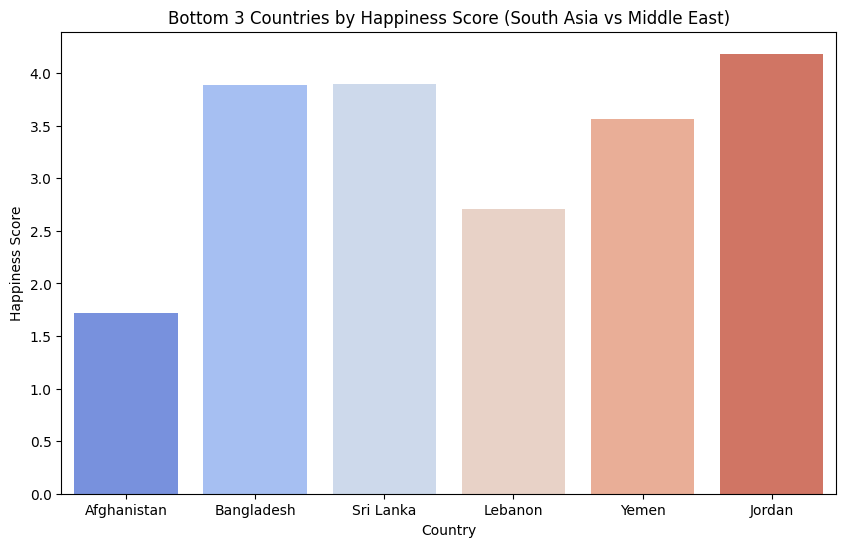

In [171]:
# Bar charts for comparison
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Country name', y='score', data=pd.concat([bottom_3_southasia, bottom_3_middleeast]),
    hue='Country name', palette='coolwarm', dodge=False
)
plt.title("Bottom 3 Countries by Happiness Score (South Asia vs Middle East)")
plt.ylabel("Happiness Score")
plt.xlabel("Country")
plt.show()

**3. Metric Comparisions:**
- Compare key metrics like GDP per Capita, Social Support, & Healthy Life Expectancy between the regions using grouped bar charts

In [168]:
### Task 3: Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Calculate mean for each metric in both regions
south_asia_means = south_asian_countries_df[metrics].mean()
middle_east_means = middle_east_countries_df[metrics].mean()

print("\nMetric Comparisons (South Asia vs Middle East):")
print("\nSouth Asia Means:")
print(south_asia_means)

print("\nMiddle East Means:")
print(middle_east_means)


Metric Comparisons (South Asia vs Middle East):

South Asia Means:
Log GDP per capita         1.051833
Social support             0.611833
Healthy life expectancy    0.420333
dtype: float64

Middle East Means:
Log GDP per capita         1.496333
Social support             1.152778
Healthy life expectancy    0.554111
dtype: float64


- Finding out which metrics shows the largest disparity between the two regions.

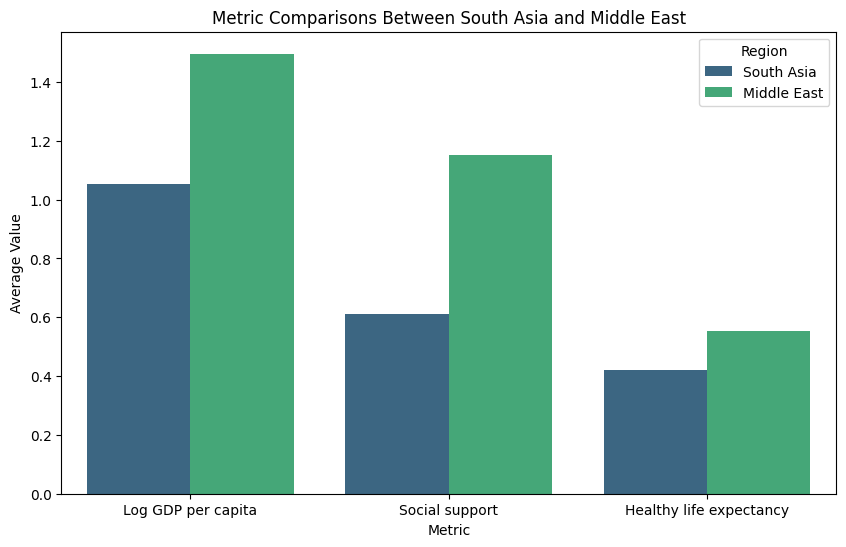

In [183]:
# Grouped bar chart for metric comparisons
metric_compare = pd.DataFrame({
    'Region': ['South Asia', 'Middle East'],
    'Log GDP per capita': [south_asian_countries_df['Log GDP per capita'].mean(), middle_east_countries_df['Log GDP per capita'].mean()],
    'Social support': [south_asian_countries_df['Social support'].mean(), middle_east_countries_df['Social support'].mean()],
    'Healthy life expectancy': [south_asian_countries_df['Healthy life expectancy'].mean(), middle_east_countries_df['Healthy life expectancy'].mean()]
})
metric_comparison_melted = metric_compare.melt(id_vars=['Region'], var_name='Metric', value_name='Average')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Average', hue='Region', data=metric_comparison_melted, palette='viridis')
plt.title("Metric Comparisons Between South Asia and Middle East")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.show()

In [184]:
disparity = metric_compare.set_index('Region').diff().abs().iloc[1]

largest_disparity_metric = disparity.idxmax()

print("\n")
print(f"The metric with the largest disparity between the two regions is: {largest_disparity_metric}")



The metric with the largest disparity between the two regions is: Social support


**4. Happiness Disparity:**
- Compute the range (min - max) & coefficent of variation (CV) for Score in both regions.
- Finding out which region has greater variability in Happiness.

In [185]:
#Task 4: Happiness Disparity
# Calculate range and coefficient of variation (CV) for Score in both regions
sa_range = south_asian_countries_df['score'].max() - south_asian_countries_df['score'].min()
me_range = middle_east_countries_df['score'].max() - middle_east_countries_df['score'].min()

sa_cv = south_asian_countries_df['score'].std() / south_asian_countries_df['score'].mean()
me_cv = middle_east_countries_df['score'].std() / middle_east_countries_df['score'].mean()

print("\nHappiness Disparity:")
print(f"South Asia - Range: {sa_range}, CV: {sa_cv:.2f}")
print(f"Middle East - Range: {me_range}, CV: {me_cv:.2f}")


Happiness Disparity:
South Asia - Range: 3.4370000000000003, CV: 0.30
Middle East - Range: 4.634, CV: 0.29


**5. Correlation Analysis:**
- Analyze the correlation of Score with other metric Freedom to Make Life Choices, & Generosity within each region.

In [174]:
### Task 5: Correlation Analysis
# Correlation of Score with other metrics
correlations_sa = south_asian_countries_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
correlations_me = middle_east_countries_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("\nCorrelation Analysis (South Asia):")
print(correlations_sa['score'])

print("\nCorrelation Analysis (Middle East):")
print(correlations_me['score'])


Correlation Analysis (South Asia):
score                           1.000000
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64

Correlation Analysis (Middle East):
score                           1.000000
Freedom to make life choices    0.863220
Generosity                      0.627524
Name: score, dtype: float64


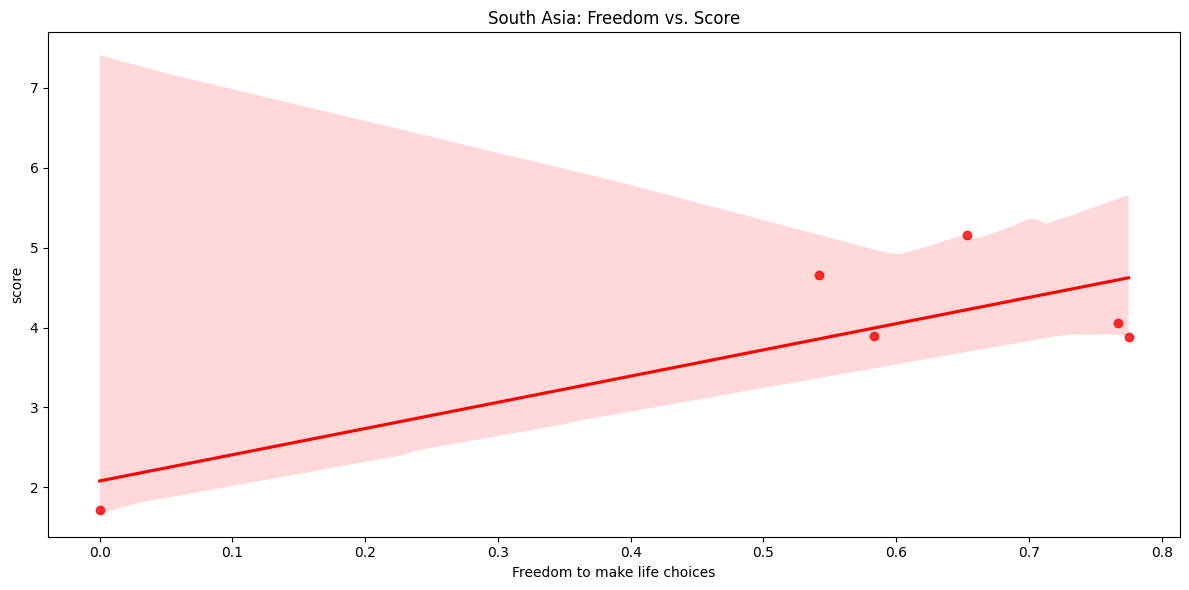

In [186]:
# For South Asia Countries
plt.figure(figsize=(12, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_countries_df, color='red')
plt.title('South Asia: Freedom vs. Score')
plt.tight_layout()
plt.show()


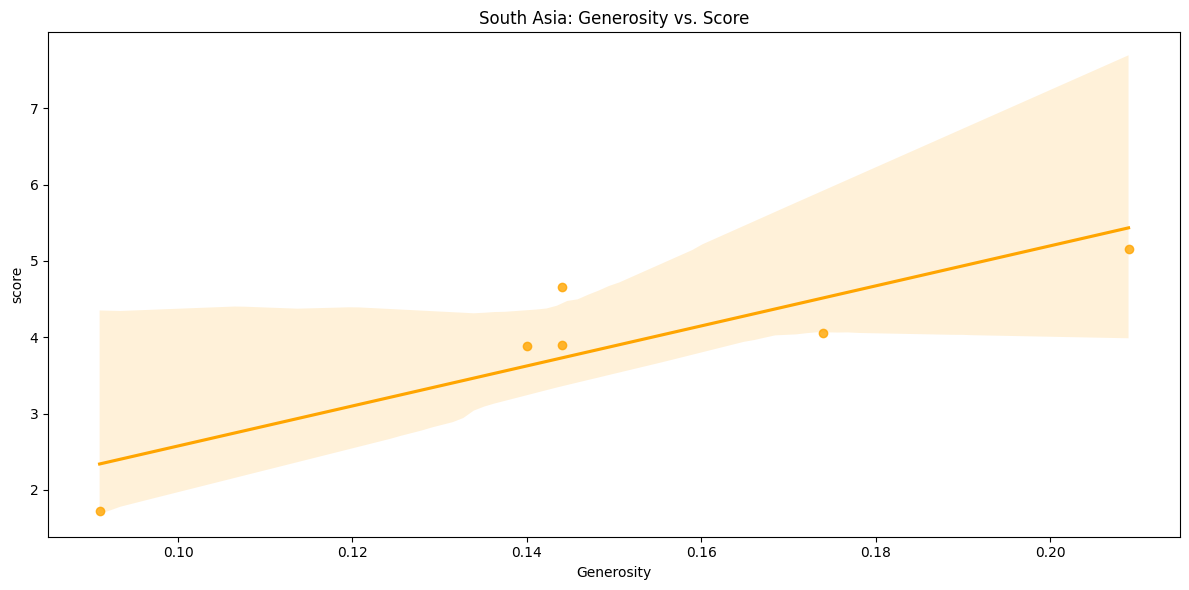

In [187]:
# For South Asia Countries
plt.figure(figsize=(12, 6))
sns.regplot(x='Generosity', y='score', data=south_asian_countries_df, color='orange')
plt.title('South Asia: Generosity vs. Score')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Middle East: Freedom vs. Score')

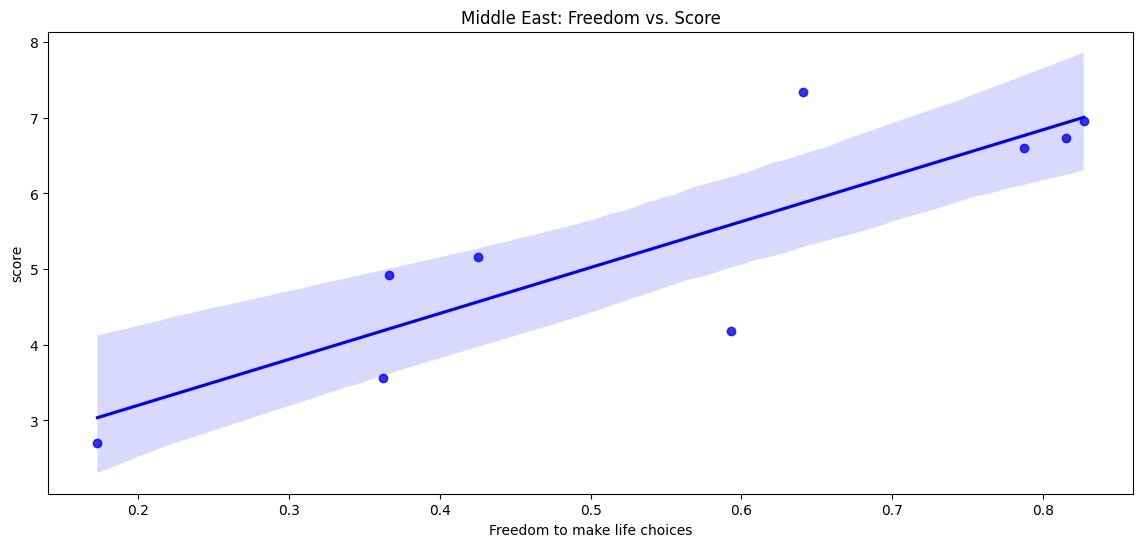

In [190]:
# Middle East
plt.figure(figsize=(14, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_countries_df, color='blue')
plt.title('Middle East: Freedom vs. Score')

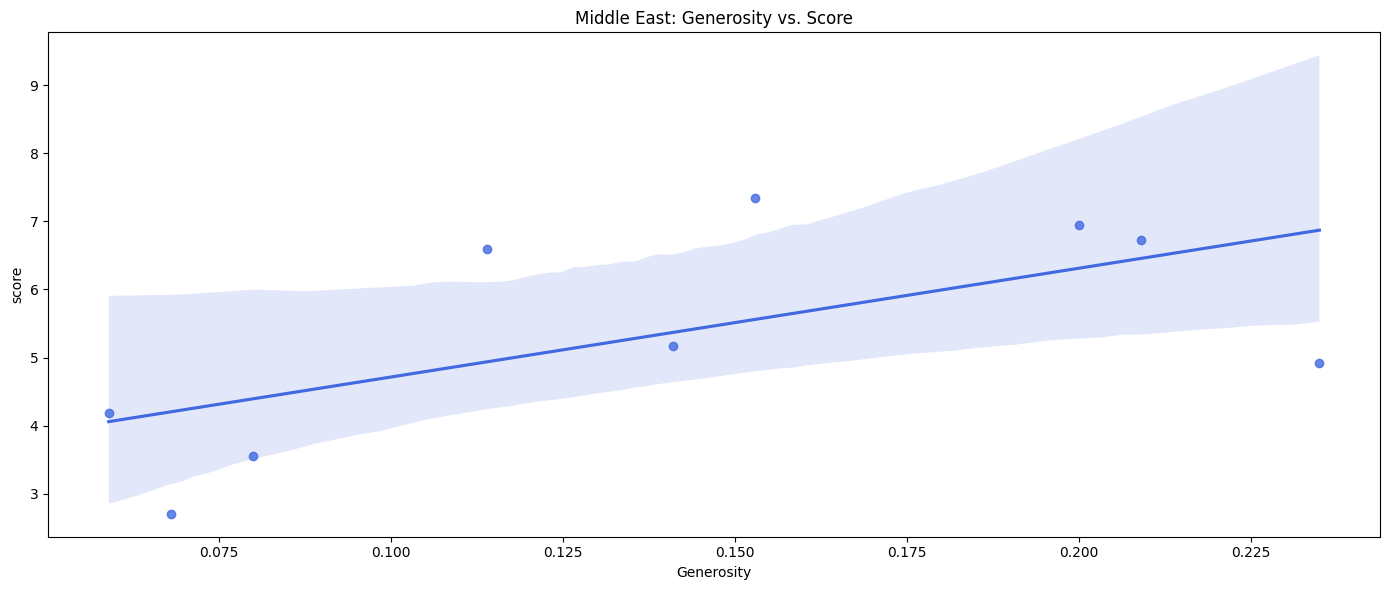

In [191]:
plt.figure(figsize=(14, 6))

sns.regplot(x='Generosity', y='score', data=middle_east_countries_df, color='royalblue')
plt.title('Middle East: Generosity vs. Score')
plt.tight_layout()
plt.show()

- Creating a scatter points to visualize and interpret the relationships between Freedom to Make Life Choices &Generosity.

**6. Outlier Detection:**
- Identify outlier countries in both regions based on Score and GDP per Capita.
- Plotting these outlier and discuss their implications.

In [196]:
### Task 6: Outlier Detection
# Define outliers using 1.5 * IQR for Score in both regions
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_sa = find_outliers(south_asian_countries_df, 'score')
outliers_me = find_outliers(middle_east_countries_df, 'score')

outliers_sac = find_outliers(south_asian_countries_df, 'Log GDP per capita')
outliers_mec = find_outliers(middle_east_countries_df, 'Log GDP per capita')

print("\nOutliers in South Asia based on Score:")
print(outliers_sa[['Country name', 'score']])

print("\nOutliers in Middle East based on Score:")
print(outliers_me[['Country name', 'score']])

print("\nOutliers in South Asia based on Score:")
print(outliers_sac[['Country name', 'Log GDP per capita']])

print("\nOutliers in South Asia based on Score:")
print(outliers_mec[['Country name', 'Log GDP per capita']])


Outliers in South Asia based on Score:
    Country name  score
142  Afghanistan  1.721

Outliers in Middle East based on Score:
Empty DataFrame
Columns: [Country name, score]
Index: []

Outliers in South Asia based on Score:
    Country name  Log GDP per capita
142  Afghanistan               0.628

Outliers in South Asia based on Score:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


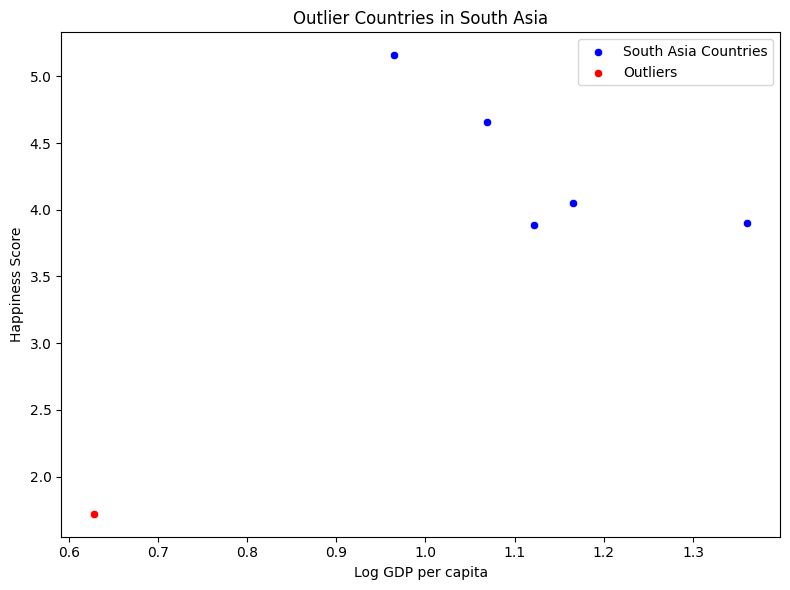

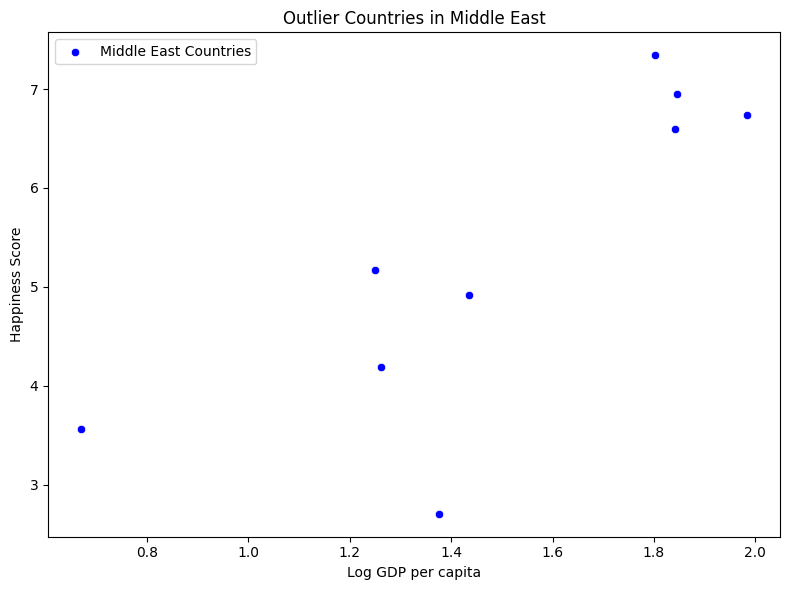

In [197]:
south_asia_all_outliers = pd.concat([outliers_sa, outliers_sac])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_countries_df, color='blue', label='South Asia Countries')
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_all_outliers, color='red', label='Outliers')
plt.title("Outlier Countries in South Asia")
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()


middle_east_all_outliers = pd.concat([outliers_me, outliers_mec])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_countries_df, color='blue', label='Middle East Countries')
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_all_outliers, color='red', label='Outliers')
plt.title("Outlier Countries in Middle East")
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()

**7. Visualization:**
- Create boxplots comparing the distribution of Score between South Asia and Middle East.
- Interpret the key differences in the distribution shapes, medians, & outliers.


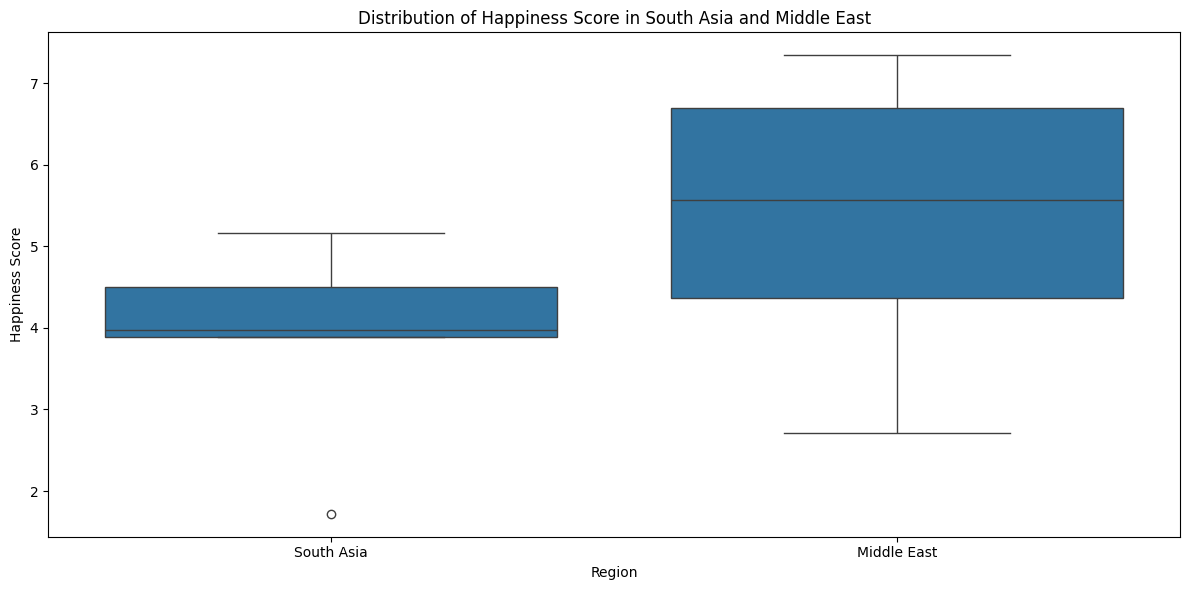

In [195]:
### Task 7: Visualization (Boxplots)
plt.figure(figsize=(12,6))

sns.boxplot(x='Region',y='score',data=pd.concat([south_asian_countries_df.assign(Region='South Asia'),middle_east_countries_df.assign(Region='Middle East')]))
plt.title('Distribution of Happiness Score in South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

1.
- Distribution Shapes (South Asia): The boxplots above clearly illustrate that the happiness scores are toward lower values, indicating that a significant number of countries in this region have relatively low happiness scores.

- Distribution Shapes (Middle East Asia): The boxplots above illustrates that the happiness scores are equally distributed  among all the countries indicating that a significant number of countries in this region have equal distribution of happiness scores.

2.  Medians:
The boxplots illustrates that the median of happiness score of Middle Eastern countries is higher compared to that of South Asian countries.

3. Outliers: The boxplots reveals that there are no outliers among the Middle Eastern countries. However, South Asia has one outlier with a noticeably low happiness score, which contributes to the region's variability.

4. Overall Interpretation: These key differences indicate that while the Middle East demonstrates a consistently higher overall level of happiness, South Asia exhibits greater variability, with some countries experiencing significantly lower happiness levels.